In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS
import scipy as sp
from joblib import dump,load
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV

# Linear Regression

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

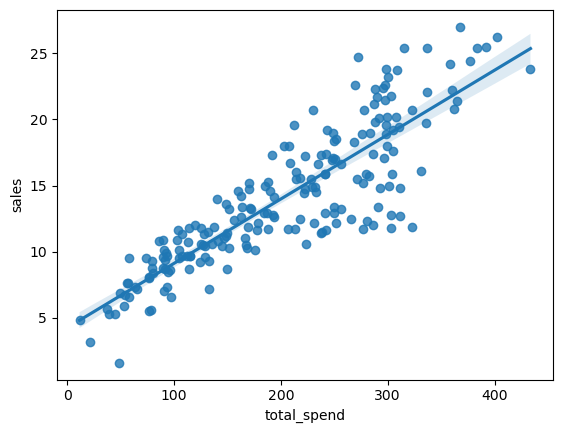

In [4]:
sns.regplot(data=df,x='total_spend',y='sales')

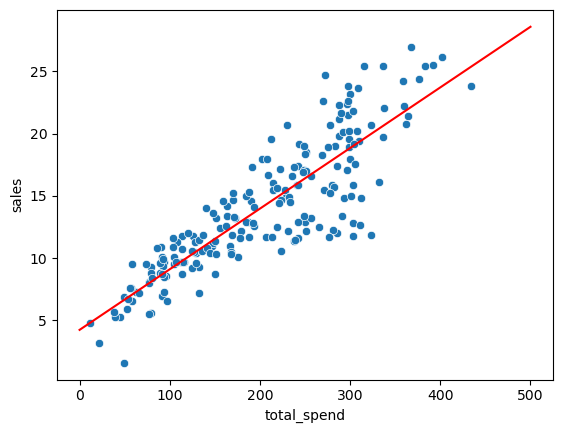

In [5]:
X = df['total_spend']
y = df['sales']

poly = np.polyfit(x=X,y=y,deg=1)
# y = mx+b
# y = B1x + B0
# polyfit returns the B coeff for X and Y
potential_spend = np.linspace(0,500,100)
predicted_sales = poly[0]*potential_spend + poly[1]

sns.scatterplot(data=df, x='total_spend', y='sales')

plt.plot(potential_spend,predicted_sales, color='red')


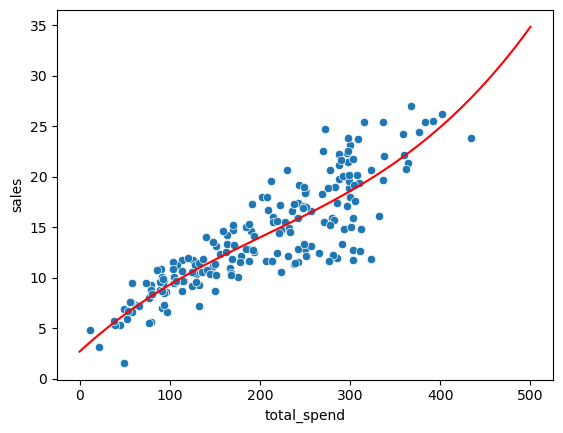

In [6]:
poly = np.polyfit(x=X,y=y,deg=3)

potential_spend = np.linspace(0,500,100)
predicted_sales = poly[0]*(potential_spend**3) + poly[1]*(potential_spend**2) + poly[2]*potential_spend + poly[3]

sns.scatterplot(data=df, x='total_spend', y='sales')

plt.plot(potential_spend,predicted_sales, color='red')

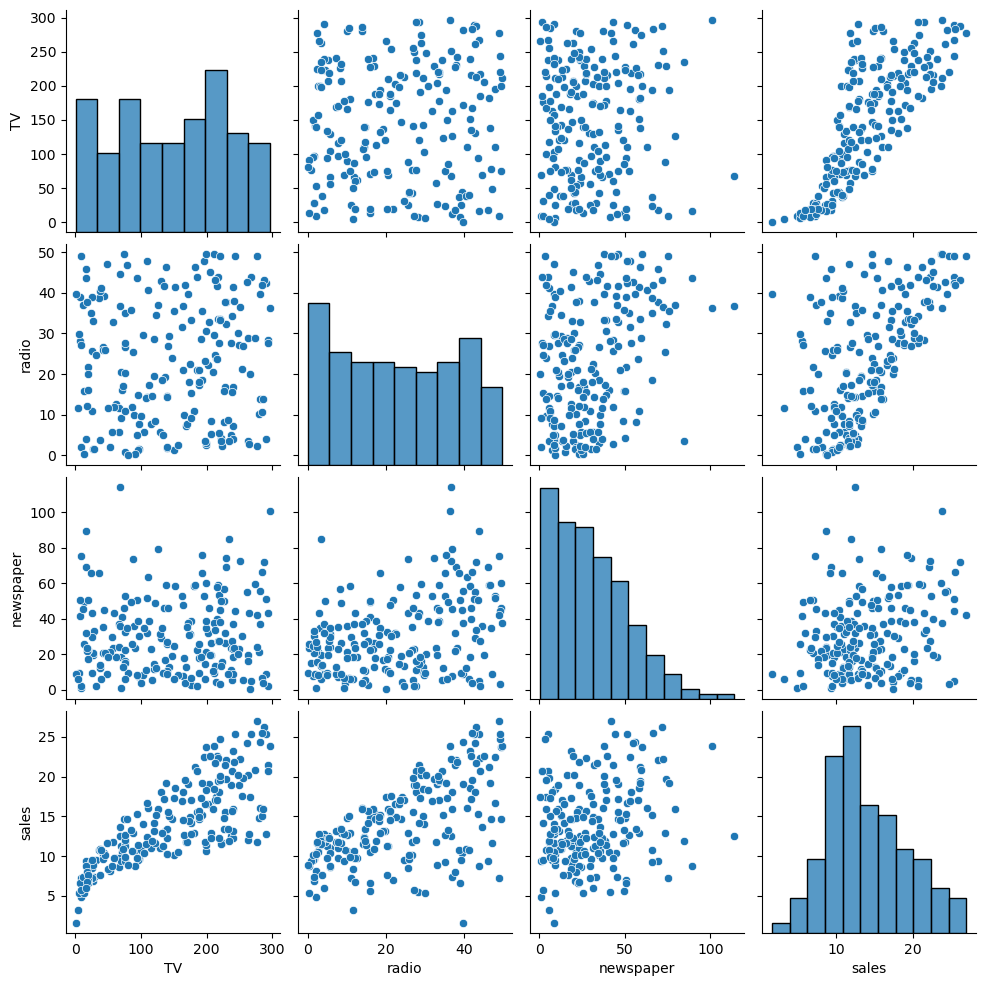

In [7]:
df = pd.read_csv('Advertising.csv')

sns.pairplot(df)

In [8]:
# Separate values into X and Y

X = df.drop('sales', axis=1)
y = df['sales']

In [9]:
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.3, random_state=101)

In [10]:
model = LR()

In [11]:
model.fit(X_train,y_train)

LinearRegression()

In [12]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [13]:
test_pred = model.predict(X_test)

#Mean Absolute Error
# Data as a whole is doing ok

MAE = mean_absolute_error(y_test,test_pred)

#RMSE
#Root Mean Square Error
# There are some data points that are far away from goal

RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

1.2137457736144805
1.5161519375993882


# Residual Points

Residual errors should be  random and close to the normal curve

If the residual plot shows a clear curve or pattern, it means that linear regression is not valid for this data set

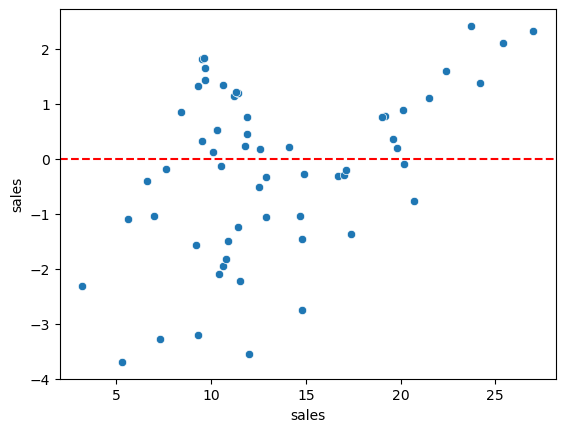

In [14]:

test_res = y_test - test_pred

sns.scatterplot(x=y_test, y=test_res)
plt.axhline(y=0,color='red',ls='--')

Checking Normal Distribution

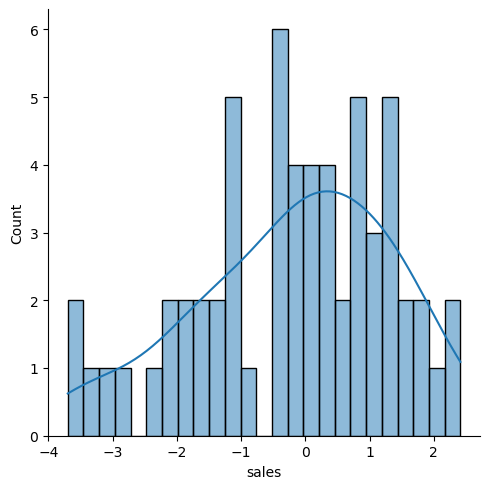

In [15]:

sns.displot(test_res,bins=25,kde=True)

Checking the probability plot

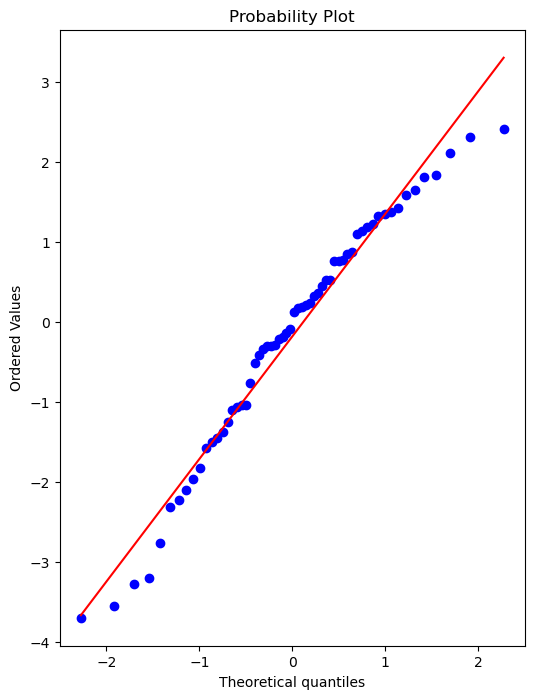

In [16]:


fig, ax = plt.subplots(figsize=(6,8),dpi=100)

_ = sp.stats.probplot(test_res,plot=ax)

# Model Deployment

Create the final model

In [17]:

final_model = LR()
final_model.fit(X,y)


LinearRegression()

Coefficiients for each column, the closer to 0 it means that there is no correlation between it and its target. 

Relationships between 1 unit increase in features

For example, if we hold all features, except Radio, fixed for each 1000 spent we will increase ny 45 units sold.

Negative coeff means that we are losing sales in this case.

In [18]:
final_coef = final_model.coef_
final_coef

array([ 0.04576465,  0.18853002, -0.00103749])

Predicting the sales with our model

We can see that the data is closely related

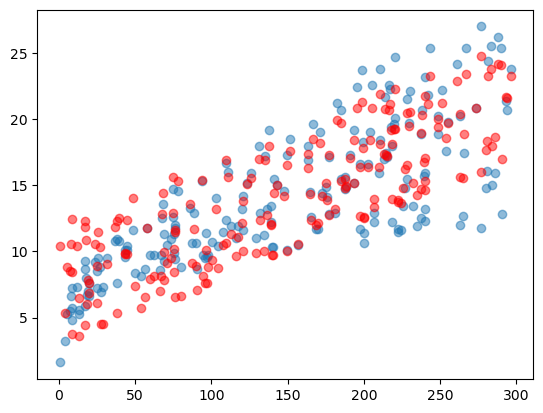

In [19]:
y_hat = final_model.predict(X)

plt.plot(df['TV'],df['sales'],'o', alpha=0.5)
plt.plot(df['TV'],y_hat,'o',color='red', alpha=0.5)


How to dump a model to use with future data

In [20]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

How to load a model to use with new data

In [21]:
loaded_model = load('final_sales_model.joblib')

In [22]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

 Running a test campaign with our model

149 TV, 22 Radio, 12 Newspaper

In [23]:
campaign =  [[149,22,12],[120,12,34]]

loaded_model.predict(campaign)

c:\Users\aguil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032  , 10.65773226])

# Polynomial Regression

For some cases, linear regression is not the best way to find a linear relationship with the curve formed by the data.

Interaction terms are features that interact with other features by either improving or unimproving the resulting target.


In [24]:
df = pd.read_csv('Advertising.csv')

# Separate X features from their labels

X = df.drop('sales', axis=1)
y = df['sales']

# Create the polynomial converter

poly_conv = PolynomialFeatures(degree=2,include_bias=False)

poly_conv.fit(X)

poly_feat = poly_conv.transform(X)

# This will give us our interaction terms
# We will train our model with this term instead of the original data,
# this will give us more signal from our data.

# We can also get this results by doing the following:
poly_feat = poly_conv.fit_transform(X)


# Training and  Evaluation

To compare models we have to use the same values for test_size and random_state

We have to use the polynomial features (poly_feat) on this TTS, not X

In [25]:
#
# 
#


# 


X_train, X_test, y_train, y_test = tts(poly_feat, y, 
                                       test_size=0.3, random_state=101)

model = LR()

model.fit(X_train,y_train)

test_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

print(MAE)
print(RMSE)

# 
#

0.4896798044803768
0.6646431757269228


Our results for the linear model were:

MAE_L = 1.2137457736144805

RMSE_L = 1.5161519375993882


Here we get:

MAE_L = 0.4896798044803768

RMSE_L = 0.6646431757269228

In [26]:
# Now comparing the coefficients

model.coef_

# Here we can see that the coefficients for newspaper is really low.

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

# Over-fitting and Under-fitting

A good model should plot neatly within the data, meaning we will get low error values for new data.

By overfitting we may hit all the points in the data but resulting in a lot of noise, meaning that when we give it new data, it might give us a large amount of error.


By underfitting we are generaliziing too much, meaning that for some values we might get accurate values, but for untrained data we will not.

# Model Complexity

A good model should decrease it's error rate as the model beecomes more complex.

A bad model would normally increase it's error rate as the model becomes more complex.

Testing for Overfitting
- For this we plot our model complexity v error graph, and it should normally increase it's error rate as it becomes more complex.

- Where this lines cross is where we should pick the appropiate values.

- For certain algorithims this could be a sudden jump.

# Adjusting Model Parameters

To adjust our model parameters we need to check whatt degree we should use for our model, for this we are going to measure our error to degree of complexity.

1. Create the diifferent order polynomials
2. Split poly feat train/test
3. fit on train
4. store the RMSE for both train and test data
5. plot the results

In [27]:
df = pd.read_csv('Advertising.csv')

X = df.drop('sales', axis=1)
y = df['sales']

train_RMSE_err = []
test_RMSE_err = []

# It is not necessary to go to 10 degrees for data with low features.

for d in range(1,10):

    poly_conv = PolynomialFeatures(degree=d,  include_bias=False)
    poly_feat = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test = tts(poly_feat, y, 
                                       test_size=0.3, random_state=101)
    
    model = LR()
    model.fit(X_train,y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_RMSE_err.append(train_RMSE)
    test_RMSE_err .append(test_RMSE)


We can now check our error values.

We can see a slight jump in our train data, and a big jump in our test data in higher degrees.

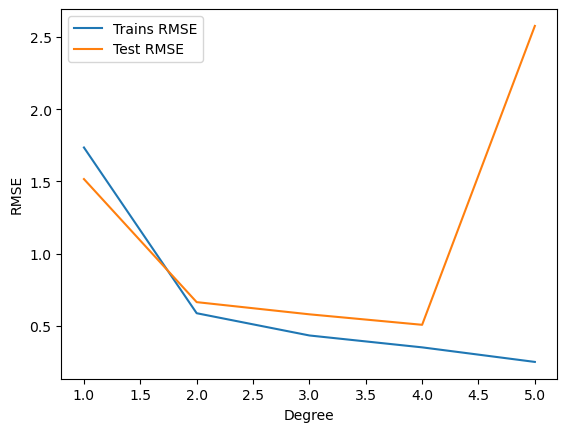

In [28]:
plt.plot(range(1,6),train_RMSE_err[:5], label='Trains RMSE')
plt.plot(range(1,6),test_RMSE_err[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree')
plt.legend()

# Model Deployment

 From the previous test we can determine that the best degree we could use is 3. Choosing 4 makes it closer to the jump point for the errors to be higher.

In [29]:
final_poly_conv = PolynomialFeatures(degree = 3, include_bias=False)

final_model = LR()

full_conv_X = final_poly_conv.fit_transform(X)

final_model.fit(full_conv_X,y)

dump(final_model,'Final_poly_model.joblib')
dump(final_poly_conv,'Final_conv.joblib')

['Final_conv.joblib']

Now, here we can load these two files to work on some new data.

In [30]:
loaded_conv = load('Final_conv.joblib')
loaded_model = load('Final_poly_model.joblib')

campaign = [[149,22,12]]

trans_data = loaded_conv.fit_transform(campaign)

loaded_model.predict(trans_data)

array([14.64501014])

# Regularization

It seeks to solve model issues such as:

- Minimizing model complexity
- Penalizing the loss function
- Reducing overfitting

Main Types of Regularization:

- L1 or LASSO Regression
  > - Adds a penalty equal to the abs val of the magnitude of coeff.

- L2 or Ridge Regression
  > - Adds a penalty equal to the square of the magnitud of coeff.
  
- L1 and L2 or Elastic Net
  > - Combines L1 and L2, adding an alpha paramter deciding the ratio between them




# Feature Scaling

Upsides:
 - It improves the convergencee of steepest descent algorithms.

 -  If our features are in different scales, certain weights may update faster than others.
 
 - It makes it easier to compare coeff to one another.

Downsides:
 - As it is trained on scaled data, new data has to be also scaled.  

 - Harder to relate back to unscaled features.


 Two ways to scale:
 - Standarization
    - Rescales data to have a  mean of 0 and a std of 1.

 - Normalization:
    - Rescales data to values between 0 and 1.


# Feature Scaling Process:
- Perform TTS
- Fit to training feat data
- Transform training feat data
- Transform test feat data

# Cross Validation

It is a more advanced set of methods for splitting data into training and test sets.

We can train and test on all data with Cross Validation.

For this we have to split our data and evaluate it K number of times, meaning that it takes a toll on our computation.



# Regularization Data Set Up

In [31]:
df = pd.read_csv('Advertising.csv')

X = df.drop('sales', axis = 1)
y = df['sales']

poly_conv = PolynomialFeatures(degree=3, include_bias=False)

poly_feat =  poly_conv.fit_transform(X)

X_train, X_test, y_train, y_test = tts(poly_feat, y, 
                                       test_size=0.3, random_state=101)



# Scaling the data

Don't fit the whole X values as this will cause data leakage from our Y values.

In [32]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Ridge Regression

Sklearn refers to lambda as alpha

In [33]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [34]:
test_pred = ridge_model.predict(X_test)

In [35]:
MAE = mean_absolute_error(y_test,test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

0.5774404204714175
0.8946386461319681


We can cross validate with this simple function.

In [36]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10.0))
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

We can see what the best alpha was using the following function:

In [37]:
ridge_cv_model.alpha_

0.1

In [38]:
test_pred = ridge_cv_model.predict(X_test)

Now with our new alpha value we can check our MAE and RMSE again. Here we can see that we improved on our values compared to an alpha of 10.

In [57]:
MAE = mean_absolute_error(y_test, test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

0.4335034618590069
0.6063140748984026


Now let's see the coeff.

In [58]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

# Lasso Reegression

Lasso regression gives us the advantages that we can obtain coeff values at 0 with a high enough lambda value.

Models are also  much easier to interpret.



We can play with te eps and max_iter values for our model to run correctly and prevent any errors.

Let's check our model using the baseline values.

In [47]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100,cv=5, max_iter=100)

In [48]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1, max_iter=100)

In [49]:
lasso_cv_model.alpha_

0.4943070909225828

Here we can see that we didn't get better results when compared to the Ridge regression. But what benefits can we see from Lasso?

In [51]:
test_pred = lasso_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

0.6541723161252856
1.1308001022762535


We can see that we get almost all 0 for our coeff, meaning that the model is just taking two features into consideration. Giving us the most important features in our set.

In [52]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

We can improve on our MAE and RMSE by decreasing our epsilon value and increasing the max interations.

In [55]:
lasso_cv_model = LassoCV(eps=0.001, n_alphas=100,cv=5, max_iter=1000000)

lasso_cv_model.fit(X_train,y_train)

test_pred = lasso_cv_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

0.4335034618590069
0.6063140748984026


But we can see that this comes to the cost of increasing the amount of features it takes into consideration. Giving us a more complex model.

Take in mind that we are still getting a more simple model when compared to  our Ridge regression.

In [56]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

# Elastic Net

We can see that Lasso brings coeff down to 0, but how does it do that?

If we plot out our beta coeff for both Lasso we get an area roughly similar to a square (2D, in high dimensions we are going to call it a hypercube), and for Ridge we are going to get a circle.

When we plot out our lasso line, we are going to see that it lies tangent to the boudary and it will encounter a corner of a hypercube, for which our coeff will be 0.



Elastic net seeks to improve by combining both. 

Let's check this model using the baseline values.

In [66]:
elastic_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,1], eps=0.001, 
                             n_alphas=100,max_iter=1000000)

elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=1000000)

Our L ratio is the ratio of weight given to the Ridge and Lasso regression, going from 0 to 1 respectively.

Siimple data sets might give us a more direct answer.

Here we can see we get 1, meaning the model is only using the Lasso model.

In [67]:
elastic_model.l1_ratio_ 

1.0

Checking the alpha we can confirm that we get the same values as the lasso model. Meaning our prediction results should be similar to our Lasso results.

In [68]:
print(lasso_cv_model.alpha_)
print(elastic_model.alpha_)

0.004943070909225827
0.004943070909225827


We can also see that MAE and RMSE is also the same.

In [71]:
test_pred = elastic_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_pred)
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

print(MAE)
print(RMSE)

0.4335034618590069
0.6063140748984026
